Lynne Rendall 17/11/2022

## __Example Dashboard__
<br>
<br>
<br>


url for voila 
http://localhost:8888/voila/render/Downloads/dashboard-test.ipynb?

#### __Colormap Normalizations SymLogNorm__

##### Demonstration of using norm to map colormaps onto data in non-linear ways.

Synthetic dataset consisting of two humps, one negative and one positive, the positive with 8-times the amplitude. Linearly, the negative hump is almost invisible, and it is very difficult to see any detail of its profile. With the logarithmic scaling applied to both positive and negative values, it is much easier to see the shape of each hump.

Text(-2.5, 1.5, 'linear')

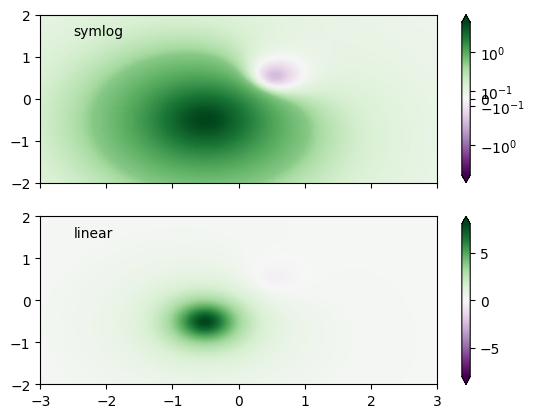

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


def rbf(x, y):
    return 1.0 / (1 + 5 * ((x ** 2) + (y ** 2)))

N = 200
gain = 8
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = rbf(X + 0.5, Y + 0.5)
Z2 = rbf(X - 0.5, Y - 0.5)
Z = gain * Z1 - Z2

shadeopts = {'cmap': 'PRGn', 'shading': 'gouraud'}
colormap = 'PRGn'
lnrwidth = 0.5

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1,
                                              vmin=-gain, vmax=gain, base=10),
                       **shadeopts)
fig.colorbar(pcm, ax=ax[0], extend='both')
ax[0].text(-2.5, 1.5, 'symlog')

pcm = ax[1].pcolormesh(X, Y, Z, vmin=-gain, vmax=gain,
                       **shadeopts)
fig.colorbar(pcm, ax=ax[1], extend='both')
ax[1].text(-2.5, 1.5, 'linear')

<br>
<br>
<br>

#### __Nested pie charts__

##### The most straightforward way to build a pie chart is to use the pie method.

In this case, pie takes values corresponding to counts in a group. We'll first generate some fake data, corresponding to three groups. In the inner circle, we'll treat each number as belonging to its own group. In the outer circle, we'll plot them as members of their original 3 groups.

The effect of the donut shape is achieved by setting a width to the pie's wedges through the wedgeprops argument.

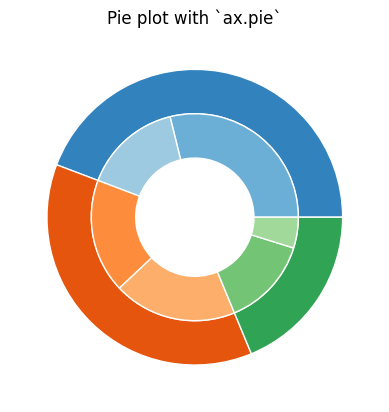

In [2]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

<br>
<br>
<br>

#### __Plotting masked and NaN values__
##### Sometimes you need to plot data with missing values.

One possibility is to simply remove undesired data points. The line plotted through the remaining data will be continuous, and not indicate where the missing data is located.

If it is useful to have gaps in the line where the data is missing, then the undesired points can be indicated using a masked array or by setting their values to NaN. No marker will be drawn where either x or y are masked and, if plotting with a line, it will be broken there.

The following example illustrates the three cases:

* Removing points.

* Masking points.

* Setting to NaN.

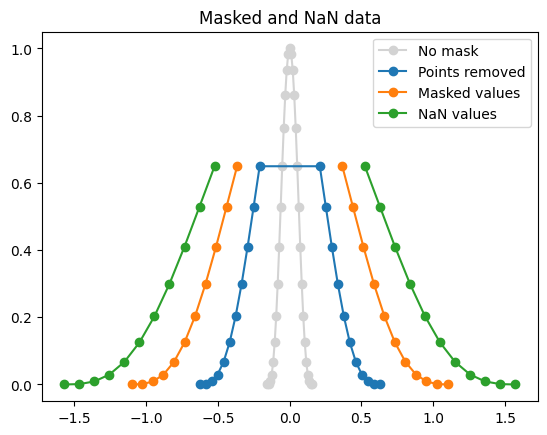

In [3]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()